# problem Statement

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# Import Necessary Libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Dataset Description:



Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

# Check for shape of dataset

In [76]:
# Checking for shape of dataset
print("Number of Rows : ", df.shape[0])
print("Number of Columns : ", df.shape[1])
pd.set_option('display.max_rows',None) 
df.head()

Number of Rows :  8425
Number of Columns :  23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [77]:
colllist = df.columns
colllist

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [78]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

# Let's check for Null Values

In [79]:
df.isin([' ','NA','-']).sum().any()

False

In [80]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainToday                 240        2.848665
Rainfall                  240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9am                    56     

# Let's Seperate Categorical & Numerical features

In [81]:
cat = ['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [82]:
num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Outliers Detection

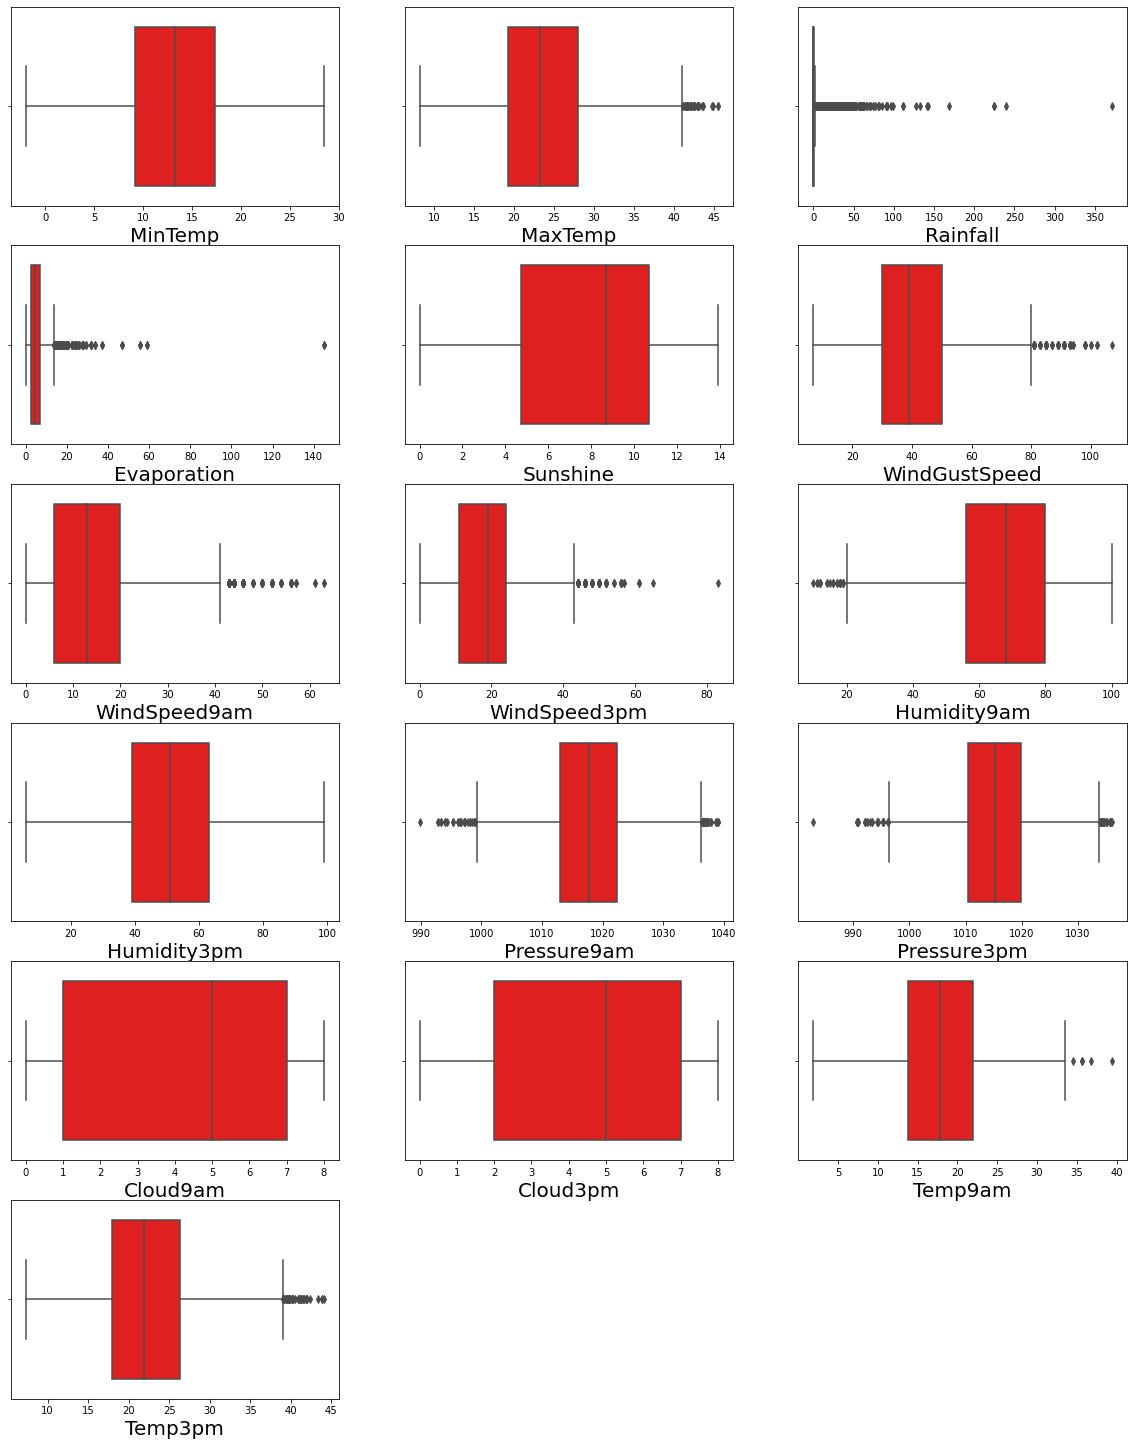

In [83]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for i in num:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[i],color='r')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

From the above boxplots we can see that the outliers are present in some features

# Missing value Imputation

Since 'Rainfall', 'Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm' are the numerical features and they have outliers we will impute missing values of these features by median

And Since 'MinTemp','Sunshine','Humidity3pm','Cloud9am','Cloud3pm' does not contains outliers. So we will impute missing values of these columns by mean

Missing values of Categorical features will be imputed by mode

In [84]:
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])


# Check whether missing values are imputed or not

In [85]:
df.isnull().sum().sum()

0

Means all the null values are filled

# Split the feature 'Date'

In [86]:
df['Date']=pd.to_datetime(df['Date'])

In [87]:
#Extract Day, Month and Year column from policy_bind_date
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# drop the original Date feature
df.drop('Date',axis=1,inplace=True)

In [88]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,4.6,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,4.6,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,4.6,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,4.6,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,4.6,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
5,Albury,14.6,29.7,0.2,4.6,7.632205,WNW,56.0,W,W,...,1005.4,4.566622,4.503183,20.6,28.9,No,No,6,12,2008
6,Albury,14.3,25.0,0.0,4.6,7.632205,W,50.0,SW,W,...,1008.2,1.000000,4.503183,18.1,24.6,No,No,7,12,2008
7,Albury,7.7,26.7,0.0,4.6,7.632205,W,35.0,SSE,W,...,1010.1,4.566622,4.503183,16.3,25.5,No,No,8,12,2008
8,Albury,9.7,31.9,0.0,4.6,7.632205,NNW,80.0,SE,NW,...,1003.6,4.566622,4.503183,18.3,30.2,No,Yes,9,12,2008
9,Albury,13.1,30.1,1.4,4.6,7.632205,W,28.0,S,SSE,...,1005.7,4.566622,4.503183,20.1,28.2,Yes,No,10,12,2008


# Droping unnecessary columns

In [89]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [90]:
df['month'].value_counts()

6     818
5     801
3     761
1     753
12    741
7     732
8     682
10    655
11    653
2     620
9     609
4     600
Name: month, dtype: int64

In [94]:
df['year'].value_counts()

2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: year, dtype: int64

In [95]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
day                int64
month              int64
year               int64
dtype: object

# Vizualization

# Categorical Features

# 1. Location

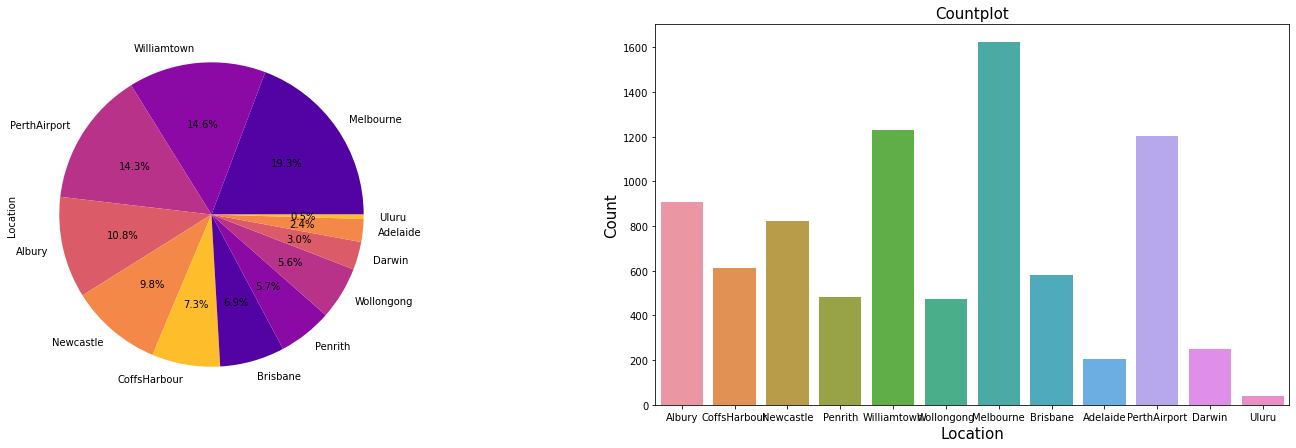

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [96]:
f,ax=plt.subplots(1,2,figsize=(25,7))

df['Location'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# fraud_reported Countplot
sns.countplot('Location',data = df,ax=ax[1])
plt.xlabel('Location', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['Location'].value_counts()

# Observations

1. Maximum records are from Melbourne and Minimum are from Uluru.

# 2. WindGustDir       

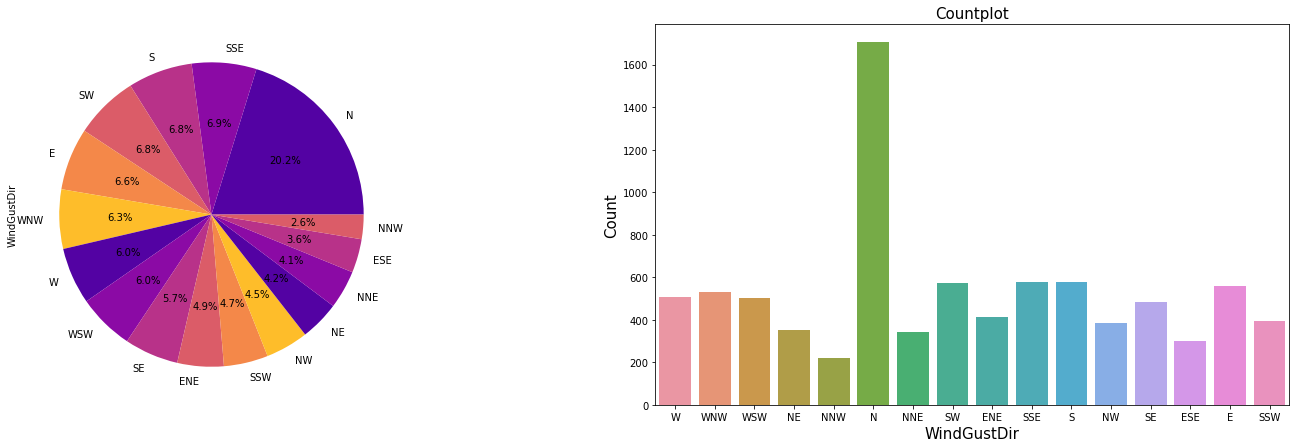

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64

In [97]:
f,ax=plt.subplots(1,2,figsize=(25,7))

df['WindGustDir'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# fraud_reported Countplot
sns.countplot('WindGustDir',data = df,ax=ax[1])
plt.xlabel('WindGustDir', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['WindGustDir'].value_counts()

for more than 20% records direction of the strongest wind gust in the 24 hours to midnight is N.

# 3. WindDir9am

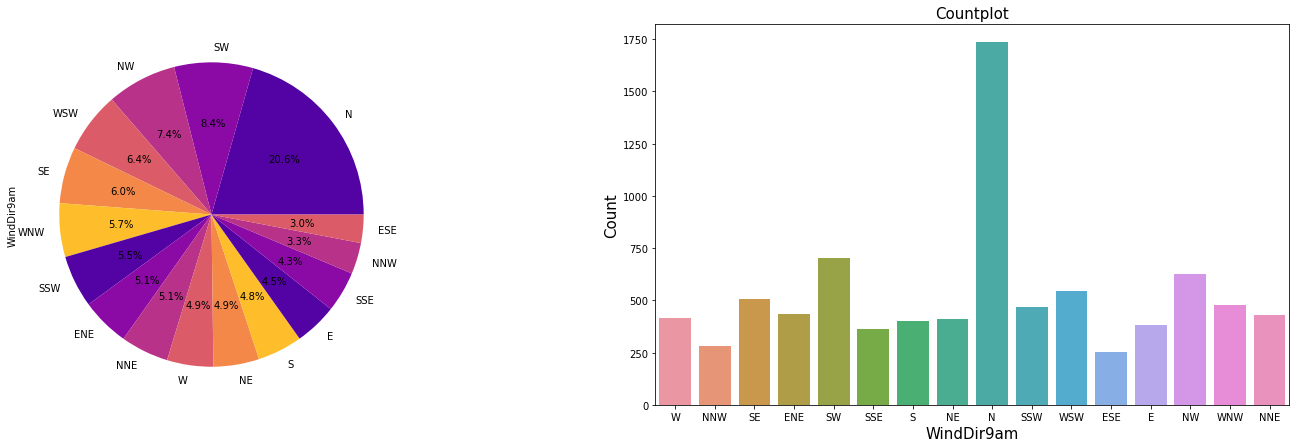

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64

In [98]:
f,ax=plt.subplots(1,2,figsize=(25,7))

df['WindDir9am'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# fraud_reported Countplot
sns.countplot('WindDir9am',data = df,ax=ax[1])
plt.xlabel('WindDir9am', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['WindDir9am'].value_counts()

# Observations

for more than 20% of the records Direction of the wind at 9am is N

# 4. WindDir3pm

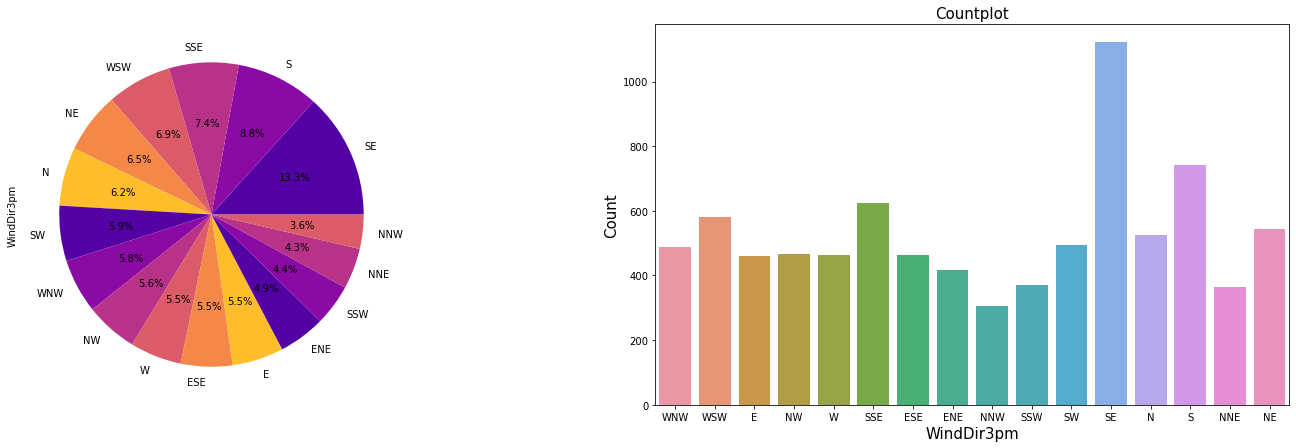

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64

In [99]:
f,ax=plt.subplots(1,2,figsize=(25,7))

df['WindDir3pm'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# fraud_reported Countplot
sns.countplot('WindDir3pm',data = df,ax=ax[1])
plt.xlabel('WindDir3pm', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['WindDir3pm'].value_counts()

for near about 13.3% records the direction of the wind at 3pm is SE.

# 5. RainToday

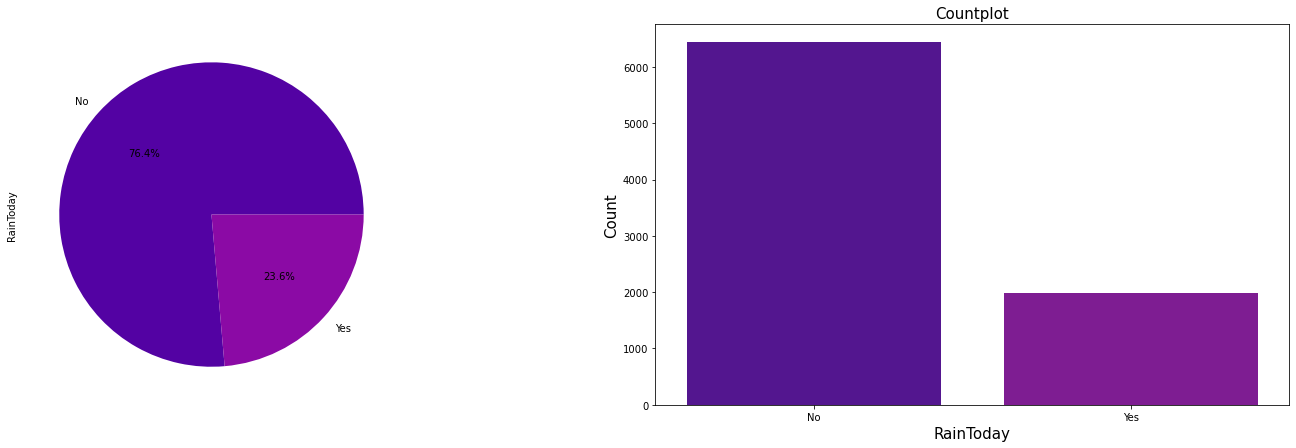

No     6435
Yes    1990
Name: RainToday, dtype: int64

In [100]:
f,ax=plt.subplots(1,2,figsize=(25,7))

df['RainToday'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# fraud_reported Countplot
sns.countplot('RainToday',data = df,ax=ax[1])
plt.xlabel('RainToday', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['RainToday'].value_counts()

# Observations

for more than 76% records there is no rain today

# 6. RainTomorrow

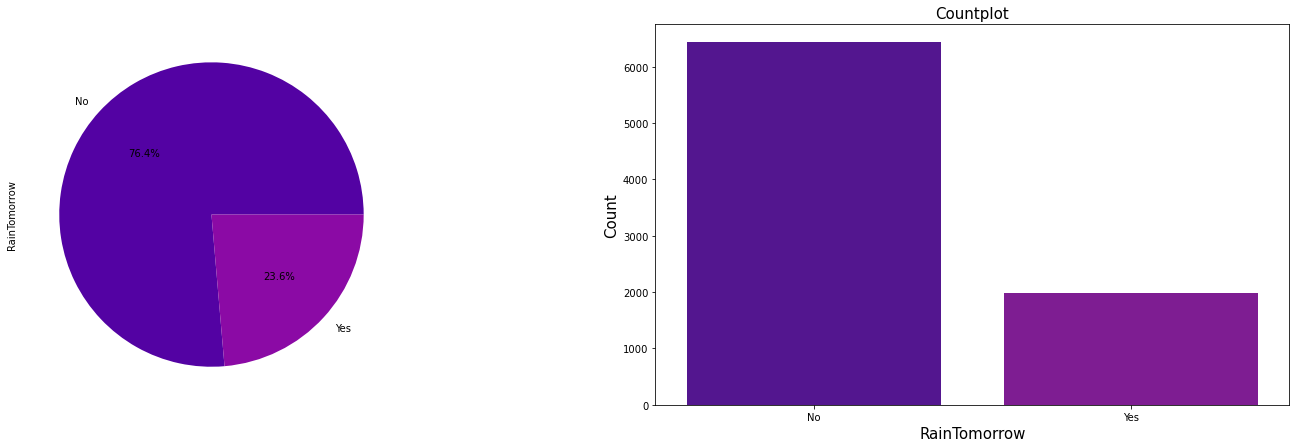

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [101]:
f,ax=plt.subplots(1,2,figsize=(25,7))

df['RainTomorrow'].value_counts().plot(kind="pie",autopct='%3.1f%%',ax=ax[0])
# fraud_reported Countplot
sns.countplot('RainTomorrow',data = df,ax=ax[1])
plt.xlabel('RainTomorrow', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Countplot',fontsize=15)

plt.show()
df['RainTomorrow'].value_counts()

for more than 76% locations there is no rain tomorrow.
Also from the above countplot we can see that our target variable is highly imbalanced. So we have to balance it before building the model.

# Numerial features

In [102]:
num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

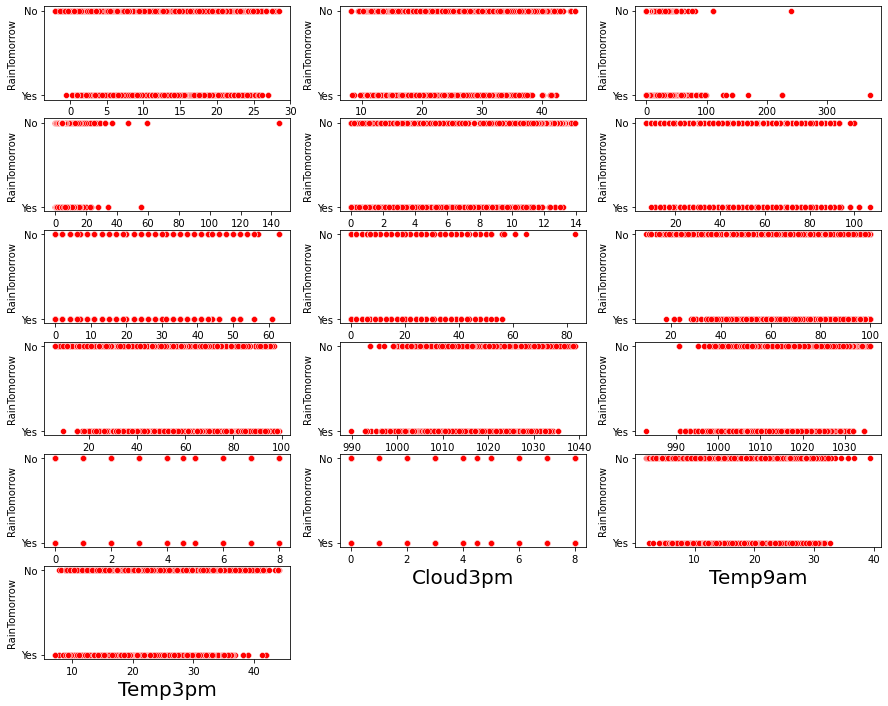

In [103]:
plt.figure(figsize=(15,12))
plotnumber=1

for column in num:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.scatterplot(x=df[column],y=df['RainTomorrow'],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

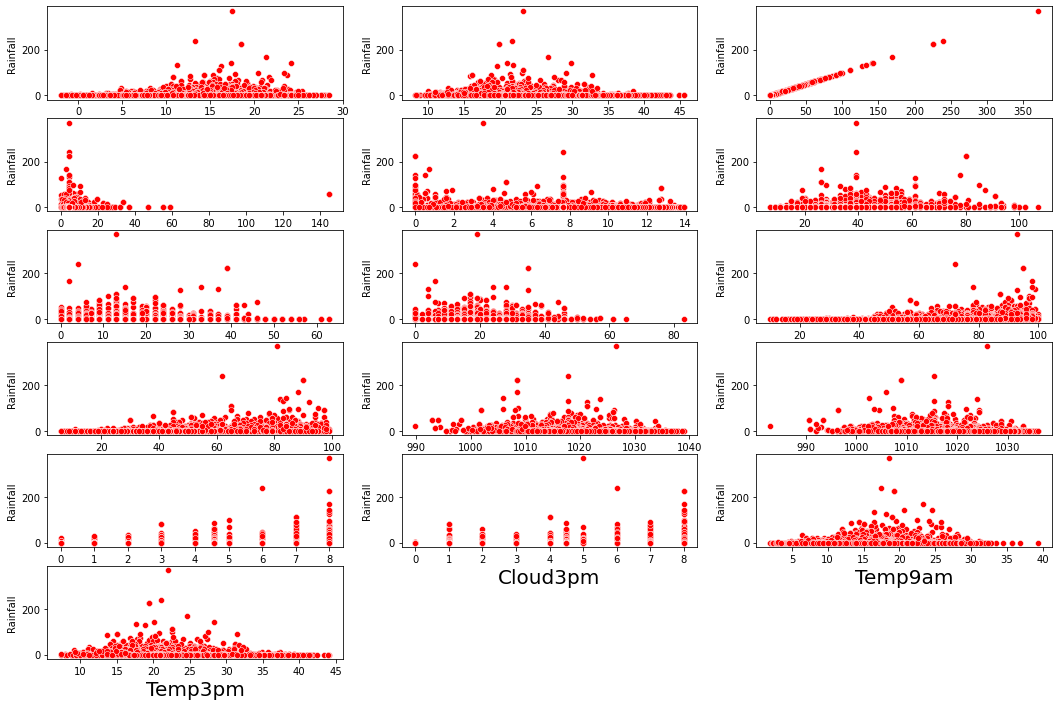

In [104]:
plt.figure(figsize=(18,12))
plotnumber=1

for column in num:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.scatterplot(x=df[column],y=df['Rainfall'],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Let's check for distribution of numerical features

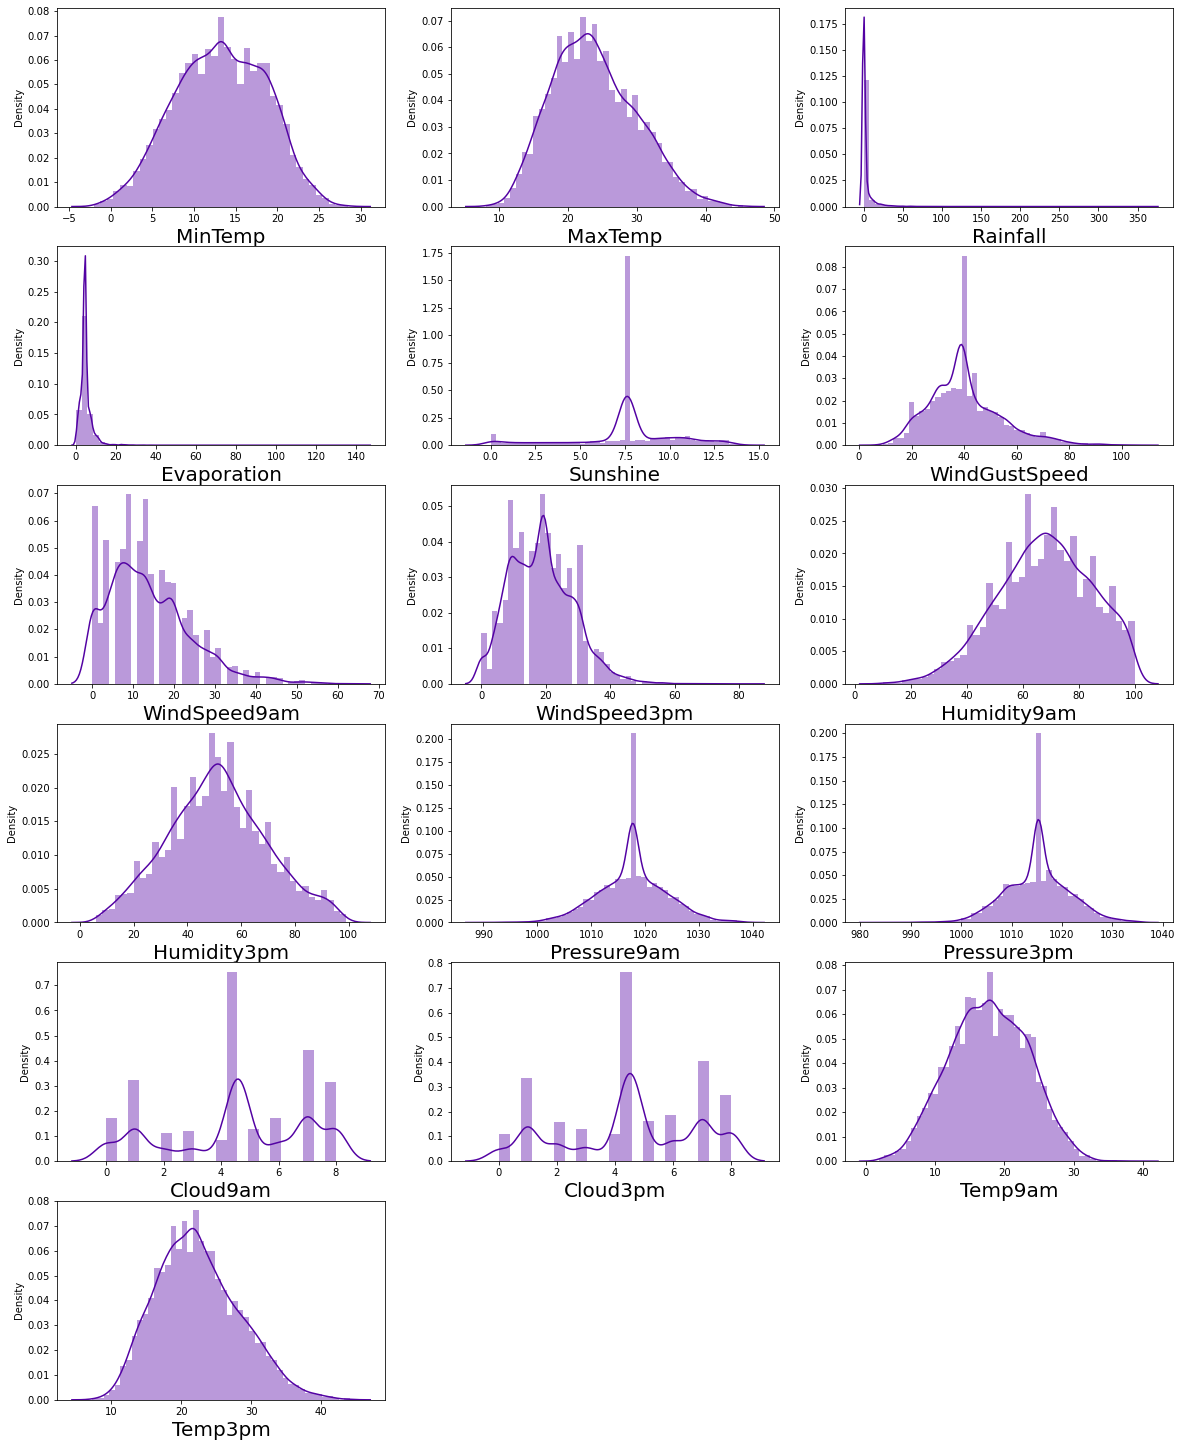

In [105]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in num:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

From the above distplot it is clear that some of the features are skewed.

In [106]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,4.6,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,4.6,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,4.6,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,4.6,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,4.6,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [107]:
cat = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [108]:
num = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','day','month','year']

# Label Encoding

In [109]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1,13.4,22.9,0.6,4.6,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,4.6,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,4.6,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,4.6,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,4.6,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


# Let's remove Outliers

In [110]:
from scipy.stats import zscore

In [111]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (8425, 25)
Shape of the dataframe after removing outliers:  (7987, 25)
Percentage of data loss post outlier removal:  5.198813056379822


# Skewness

In [112]:
df[num].skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.519090
Evaporation      1.280696
Sunshine        -0.723970
WindGustSpeed    0.539852
WindSpeed9am     0.713786
WindSpeed3pm     0.298085
Humidity9am     -0.231895
Humidity3pm      0.125150
Pressure9am      0.015962
Pressure3pm      0.039711
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038179
Temp3pm          0.337480
day              0.002731
month            0.054460
year             0.430100
dtype: float64

In [113]:
# Making the skew less than or equal to +0.6 and -0.6 for better prediction using yeo-johnson method
skew=['Rainfall','Evaporation','Sunshine','WindSpeed9am']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [114]:
df[skew].skew()

Rainfall        1.040980
Evaporation     0.061105
Sunshine       -0.066262
WindSpeed9am   -0.110908
dtype: float64

# Correlation

In [115]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
Location,1.000000,0.116694,0.063798,0.009958,0.110101,0.039174,-0.037707,0.244310,-0.041030,-0.031195,...,-0.011962,0.041859,0.027050,0.118113,0.060555,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.062858,0.392350,0.087866,-0.154935,0.231330,-0.045231,-0.154184,...,-0.428213,0.089354,0.036649,0.888692,0.687948,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.247298,0.488844,0.403083,-0.237955,0.136056,-0.217160,-0.190417,...,-0.414440,-0.252579,-0.248268,0.864866,0.975138,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.009958,0.062858,-0.247298,1.000000,-0.199885,-0.258805,0.134018,0.073838,0.155777,0.120945,...,-0.026335,0.301263,0.267605,-0.109506,-0.257461,0.932866,0.315988,-0.017966,-0.004576,0.004201
Evaporation,0.110101,0.392350,0.488844,-0.199885,1.000000,0.411843,-0.112642,0.196258,-0.094571,-0.039378,...,-0.281946,-0.134010,-0.163262,0.467830,0.473232,-0.172497,-0.093593,0.013640,-0.039374,0.103405
Sunshine,0.039174,0.087866,0.403083,-0.258805,0.411843,1.000000,-0.112272,0.024081,-0.082335,-0.073518,...,-0.074205,-0.543857,-0.555038,0.285612,0.418546,-0.223070,-0.315207,0.004631,0.001092,0.024638
WindGustDir,-0.037707,-0.154935,-0.237955,0.134018,-0.112642,-0.112272,1.000000,0.015216,0.405681,0.507292,...,-0.009187,0.123415,0.093527,-0.185115,-0.248800,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.244310,0.231330,0.136056,0.073838,0.196258,0.024081,0.015216,1.000000,-0.065432,0.076140,...,-0.336137,0.015800,0.065196,0.198924,0.101423,0.076934,0.181673,-0.004712,0.044803,-0.043508
WindDir9am,-0.041030,-0.045231,-0.217160,0.155777,-0.094571,-0.082335,0.405681,-0.065432,1.000000,0.243622,...,0.080834,0.092396,0.062637,-0.101618,-0.223778,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.120945,-0.039378,-0.073518,0.507292,0.076140,0.243622,1.000000,...,-0.037262,0.073742,0.054321,-0.171994,-0.202324,0.100983,0.003674,-0.000714,0.028629,-0.010781


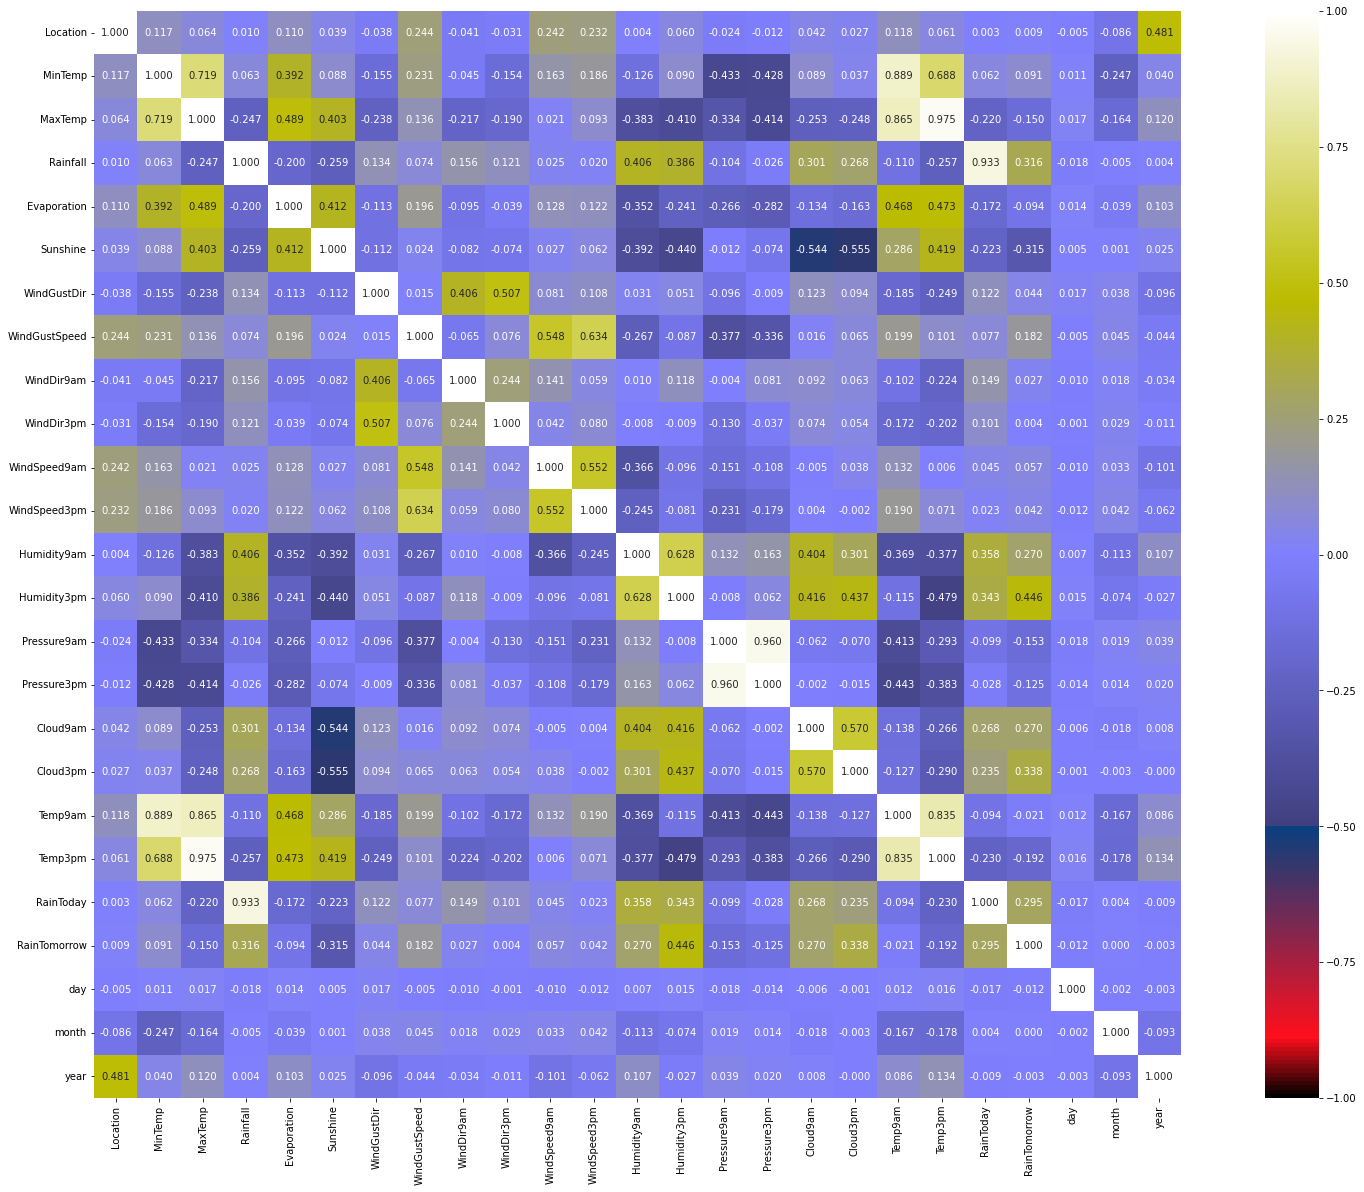

In [116]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

From the above correlation heatmap we can clearly see that there is multicollinearity present. we will

In [117]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1,13.4,22.9,0.773058,0.033069,-0.097439,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,-0.654231,0.033069,-0.097439,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,-0.654231,0.033069,-0.097439,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,-0.654231,0.033069,-0.097439,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.135607,0.033069,-0.097439,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


# Predicting RainTomorrow

# Balancing Imbalanced target variable

In [118]:
df.RainTomorrow.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

from the above value counts report we can see that our target variable is highly imbalanced.
So we have to balance it by using SMOTE technique

# Split dataset into feature & target variables

In [119]:
# Splitting data in target and dependent feature
X = df.drop(['RainTomorrow'], axis =1)
Y = df['RainTomorrow']

In [120]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [121]:
Y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

# Feature Scaling

In [122]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Let's check for Multicollinearity

Here we will use varinace inflation factor to check for multicollinearity

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.572901,Location
1,9.710184,MinTemp
2,26.266206,MaxTemp
3,4.548335,Rainfall
4,1.583455,Evaporation
5,2.010243,Sunshine
6,1.577995,WindGustDir
7,2.248506,WindGustSpeed
8,1.407314,WindDir9am
9,1.482159,WindDir3pm


Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
Another way to address Multicollinerity is to Scaled Data and then apply PCA.

# PCA

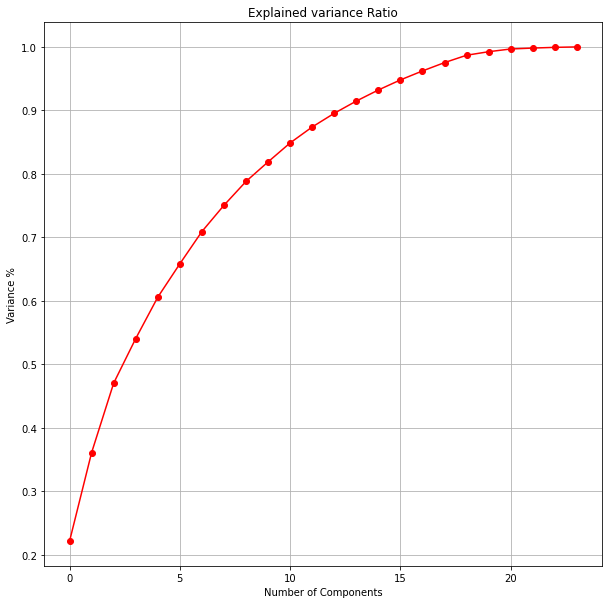

In [124]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

from the above graph we can observe that 16 principal components attribute for 90% of variation in the data. We shall pick the first 16 components for our prediction

In [125]:
pca_new = PCA(n_components=16)
x_new = pca_new.fit_transform(X_scale)

In [126]:
principle_x=pd.DataFrame(x_new,columns=np.arange(16))

# Model Building

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score

# Split data into training & testing set

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (8631, 16)
Training target vector size: (8631,)
Test feature matrix size: (3699, 16)
Test target vector size: (3699,)


# Find Best random state

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7839956745066234 on Random_state 71


# Logistic Regression

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=153, test_size=.3)
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred_lr))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_lr))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred_lr))
print('\033[1m'+'cross validation score of Logistics Regression'+'\033[0m \n',cross_val_score(LogisticRegression(),principle_x, Y,cv=10).mean())

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7761557177615572


Confusion matrix of Logistics Regression : 
 [[1457  394]
 [ 434 1414]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      1851
           1       0.78      0.77      0.77      1848

    accuracy                           0.78      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.78      0.78      0.78      3699

cross validation score of Logistics Regression 
 0.7314679643146795


# RandomForestClassifier

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=153, test_size=.3)

rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print('\033[1m'+'Random Forest Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred_rf))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_rf))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred_rf))
print('\033[1m'+'cross validation score of Random Forest Classifier'+'\033[0m \n',cross_val_score(RandomForestClassifier(),principle_x, Y,cv=10).mean())

Random Forest Classifier Evaluation


Accuracy Score of Random Forest Classifier : 0.9053798323871317


Confusion matrix of Random Forest Classifier : 
 [[1652  199]
 [ 151 1697]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1851
           1       0.90      0.92      0.91      1848

    accuracy                           0.91      3699
   macro avg       0.91      0.91      0.91      3699
weighted avg       0.91      0.91      0.91      3699

cross validation score of Random Forest Classifier 
 0.8756690997566909


# Decision Tree Classifier

In [133]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred_dt))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_dt))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred_dt))
print('\033[1m'+'cross validation score of Decision Tree Classifier'+'\033[0m \n',cross_val_score(DecisionTreeClassifier(),principle_x, Y,cv=10).mean())

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.8383346850500135


Confusion matrix of DecisionTreeClassifier : 
 [[1550  301]
 [ 297 1551]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1851
           1       0.84      0.84      0.84      1848

    accuracy                           0.84      3699
   macro avg       0.84      0.84      0.84      3699
weighted avg       0.84      0.84      0.84      3699

cross validation score of Decision Tree Classifier 
 0.8149229521492295


# KNeighborsClassifier

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=153, test_size=.3)
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print('\033[1m'+'KNeighborsClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of KNeighborsClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred_knn))
print('\n')
print('\033[1m'+'Confusion matrix of KNeighborsClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_knn))
print('\n')
print('\033[1m'+'classification Report of KNeighborsClassifier'+'\033[0m \n',classification_report(Y_test, y_pred_knn))
print('\033[1m'+'cross validation score of KNeighborsClassifier'+'\033[0m \n',cross_val_score(KNeighborsClassifier(),principle_x, Y,cv=10).mean())

KNeighborsClassifier Evaluation


Accuracy Score of KNeighborsClassifier : 0.8602324952689916


Confusion matrix of KNeighborsClassifier : 
 [[1426  425]
 [  92 1756]]


classification Report of KNeighborsClassifier 
               precision    recall  f1-score   support

           0       0.94      0.77      0.85      1851
           1       0.81      0.95      0.87      1848

    accuracy                           0.86      3699
   macro avg       0.87      0.86      0.86      3699
weighted avg       0.87      0.86      0.86      3699

cross validation score of KNeighborsClassifier 
 0.7879156528791565


# ExtraTreesClassifier

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=153, test_size=.3)
xt = ExtraTreesClassifier()
xt.fit(X_train,Y_train)
y_pred_xt=xt.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred_xt))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred_xt))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred_xt))
print('\033[1m'+'cross validation score of ExtraTreesClassifier'+'\033[0m \n',cross_val_score(ExtraTreesClassifier(),principle_x, Y,cv=10).mean())

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.927007299270073


Confusion matrix of ExtraTreesClassifier : 
 [[1681  170]
 [ 100 1748]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      1851
           1       0.91      0.95      0.93      1848

    accuracy                           0.93      3699
   macro avg       0.93      0.93      0.93      3699
weighted avg       0.93      0.93      0.93      3699

cross validation score of ExtraTreesClassifier 
 0.8933495539334956


# Hyperparameter Optimization

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
params = {'max_depth': (10,20,30,40,50,60),
         'criterion':('gini','entropy'),
         'max_depth': (7,3,8,11,13),
         'max_features': ('auto','sqrt','log2'),
         'min_samples_split': (4,9,8)
         }

In [138]:
clf = GridSearchCV(dt,param_grid = params,cv = 5,verbose = True,n_jobs = -1)

In [139]:
best_clf = clf.fit(X,Y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [140]:
best_clf.best_estimator_

DecisionTreeClassifier(max_depth=13, max_features='sqrt', min_samples_split=4)

In [141]:
accuracy_score_dt = round(best_clf.score(X,Y),3)
accuracy_score_dt

0.934

In [142]:
Final_mod = DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       min_samples_split=4)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7837253311705866


# Confusion Matrix for Final Model

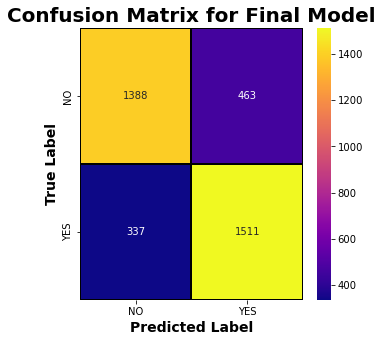

In [143]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

# AUC & ROC Curve

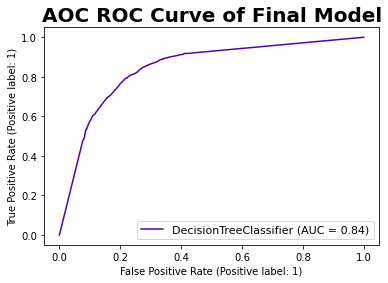

Auc Score :
 0.7837528152560568


In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [145]:
import joblib
joblib.dump(Final_mod,'Rainfall_Tomorrow.pkl')

['Rainfall_Tomorrow.pkl']

In [146]:
# Prediction
prediction = Final_mod.predict(X_test)

In [147]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(10)

,Predicted Values,Actual Values
0,1,1
1,1,1
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


# Predicting rainfall 

In [148]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1,13.4,22.9,0.773058,0.033069,-0.097439,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,-0.654231,0.033069,-0.097439,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,-0.654231,0.033069,-0.097439,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,-0.654231,0.033069,-0.097439,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.135607,0.033069,-0.097439,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


# Split dataset into feature & target variables

In [149]:
Y = df['Rainfall']

In [150]:
X = df.drop(['Rainfall'], axis =1)


# Feature Scaling

In [151]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Let's check for Multicollinearity

Here we will use varinace inflation factor to check for multicollinearity

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.594326,Location
1,8.813426,MinTemp
2,26.609449,MaxTemp
3,1.616736,Evaporation
4,2.088684,Sunshine
5,1.612260,WindGustDir
6,2.360266,WindGustSpeed
7,1.365168,WindDir9am
8,1.485019,WindDir3pm
9,2.000801,WindSpeed9am


Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
Another way to address Multicollinerity is to Scaled Data and then apply PCA.

# PCA

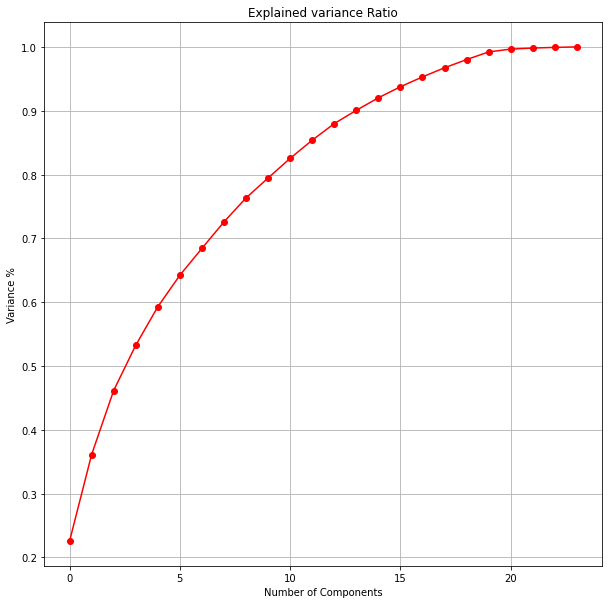

In [153]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

from the above graph we can observe that 16 principal components attribute for 90% of variation in the data. We shall pick the first 16 components for our prediction

In [154]:
pca_new = PCA(n_components=16)
x_new = pca_new.fit_transform(X_scale)

In [155]:
principle_x=pd.DataFrame(x_new,columns=np.arange(16))

# Model Building

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (5351, 16)
Training target vector size: (5351,)
Test feature matrix size: (2636, 16)
Test target vector size: (2636,)


# Finding Best Random State

In [171]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8974461344089304 on Random_state 203


# Linear Regression Model

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=203, test_size=.33)
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
y_pred_lr=lr.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_lr))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_lr)))
print('R2_Score :' ,r2_score(Y_test,y_pred_lr))
print('CV_Score_lr : ',cross_val_score(lr, X_scale, Y, cv =5).mean())

Mean absolute error : 0.2139110705739568
Mean squared error : 0.10462947631656973
Root Mean Squared Error: 0.32346479919238463
R2_Score : 0.8974461344089304
CV_Score_lr :  0.8791139987147301


# RandomForestRegressor

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=203, test_size=.33)
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_rf))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_rf)))
print('R2_Score :' ,r2_score(Y_test,y_pred_rf))
print('CV_Score_rf : ',cross_val_score(rf, X_scale, Y, cv =5).mean())

Mean absolute error : 0.16824243084153692
Mean squared error : 0.08099115452597694
Root Mean Squared Error: 0.28458944907704664
R2_Score : 0.9206155256842549
CV_Score_rf :  0.8953378722022691


# DecisionTreeRegressor

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=203, test_size=.33)
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_dt))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_dt))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_dt)))
print('R2_Score :' ,r2_score(Y_test,y_pred_dt))
print('CV_Score_dt : ',cross_val_score(dt, X_scale, Y, cv =5).mean())

Mean absolute error : 0.14812384345112498
Mean squared error : 0.1510362291482778
Root Mean Squared Error: 0.38863379825779154
R2_Score : 0.8519599859547275
CV_Score_dt :  0.8009325694450131


# KNeighborsRegressor

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=203, test_size=.33)
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_knn))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_knn)))
print('R2_Score :' ,r2_score(Y_test,y_pred_knn))
print('CV_Score_dt : ',cross_val_score(knn, X_scale, Y, cv =5).mean())

Mean absolute error : 0.23622947787516493
Mean squared error : 0.18273233874432795
Root Mean Squared Error: 0.42747203270427875
R2_Score : 0.8208926550484907
CV_Score_dt :  0.8158910735311405


# AdaBoostRegressor

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=203, test_size=.33)
ab=AdaBoostRegressor()
ab.fit(X_train,Y_train)
ab.score(X_train,Y_train)
y_pred_ab=ab.predict(X_test)
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred_ab))
print('Mean squared error :', mean_squared_error(Y_test,y_pred_ab))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred_ab)))
print('R2_Score :' ,r2_score(Y_test,y_pred_ab))
print('CV_Score_ab : ',cross_val_score(ab, X_scale, Y, cv =5).mean())

Mean absolute error : 0.2995019403823445
Mean squared error : 0.13488942546988927
Root Mean Squared Error: 0.36727295771658613
R2_Score : 0.8677864737902268
CV_Score_ab :  0.8490098648144718


Among all the algorithms used Random Forest Regressor gives us better accuracy with minimum Root Mean Squared Error.
So we will select this as final model and perform Hyperparameter optimization for this model

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
n_estimators = [2,5,7,9,15]
criterion_list = ['gini','entropy']
max_features = ["auto",'log']
max_depth = [1,4]
min_samples_split = [1,5]
min_samples_leaf = [2,6]
bootstrap = ['true','false']

In [180]:
param_grid ={'n_estimators':n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap}

In [181]:
clf = GridSearchCV(rf,param_grid = param_grid,cv = 10,verbose = True,n_jobs = -1)

In [183]:
best_clf = clf.fit(X,Y)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


In [184]:
best_clf.best_estimator_

RandomForestRegressor(bootstrap='true', max_depth=4, max_features='auto',
                      min_samples_leaf=6, min_samples_split=5, n_estimators=15)

In [185]:
param_score_rf = round(best_clf.score(X,Y),3)
param_score_rf

0.886

# Model Saving

In [186]:
import pickle

In [187]:
filename = "Rainfall"
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [188]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,Y_test)
print(result*100)

92.06155256842548


In [189]:
conclusion = pd.DataFrame([loaded_model.predict(X_test)[:],y_pred_rf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635
Predicted,-0.564296,-0.633387,0.046021,-0.619114,-0.537094,1.601133,-0.581532,-0.312916,1.713479,1.745407,...,1.814943,-0.640335,-0.380154,-0.015889,-0.487592,1.822819,-0.227061,-0.557738,-0.433167,-0.636333
Original,-0.564296,-0.633387,0.046021,-0.619114,-0.537094,1.601133,-0.581532,-0.312916,1.713479,1.745407,...,1.814943,-0.640335,-0.380154,-0.015889,-0.487592,1.822819,-0.227061,-0.557738,-0.433167,-0.636333
